In [ ]:
import processing.content_stats as cs
import yaml
from utils.utils import fetch_import_module
import nltk
nltk.download('names')
%matplotlib inline

# 2. Semantic Perspective

## Data loading

In [ ]:
config = yaml.safe_load(open("config.yaml"))

In [ ]:
dataset_names = config['datasets']
data_sets_text, exclude, exclude_empty = [], [], []
for dset in dataset_names:
    dset_module = fetch_import_module(dset)
    data_sets_text.append(dset_module.get_data())
    exclude.append(set(config['non-hate-label'][dset]))
    exclude_empty.append(set())

In [3]:
embedding_path = "../embeddings/cc.en.300.vec"

## c) Cross-dataset topic model

### Only abusive classes

Filter embedding space to 210228-Waseem-Davidson-Founta-Zampieri-Vidgen dataset...
Embedding model read in 639.865s.
210228-Waseem-Davidson-Founta-Zampieri-Vidgen:11509
Build topics...
kNN...
N Threads: 4
NearestNeighbors K=500
Time 0.005640404000587296
NN Distaces
Time 7.206440426001791
Saving cluwords
Matrix(11509, 11509)

Cosine Filter: 0.9
Computing TFIDF...
Number of cluwords 11509
Matrix(11509, 11509)

Computing TF...
tf shape (10000, 11509)
Cluwords TF done in 2.807s.
(10000, 11509)

Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=10000 and n_features=11509...
NMF done in 87.72458652599744.
Writing matrix W
W: (10000, 20) H:(11509, 20)
Writing matrix H
W: (10000, 20) H:(11509, 20)
tools/cluwords/cluwords/multi_embedding/results/210228-Waseem-Davidson-Founta-Zampieri-Vidgen


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

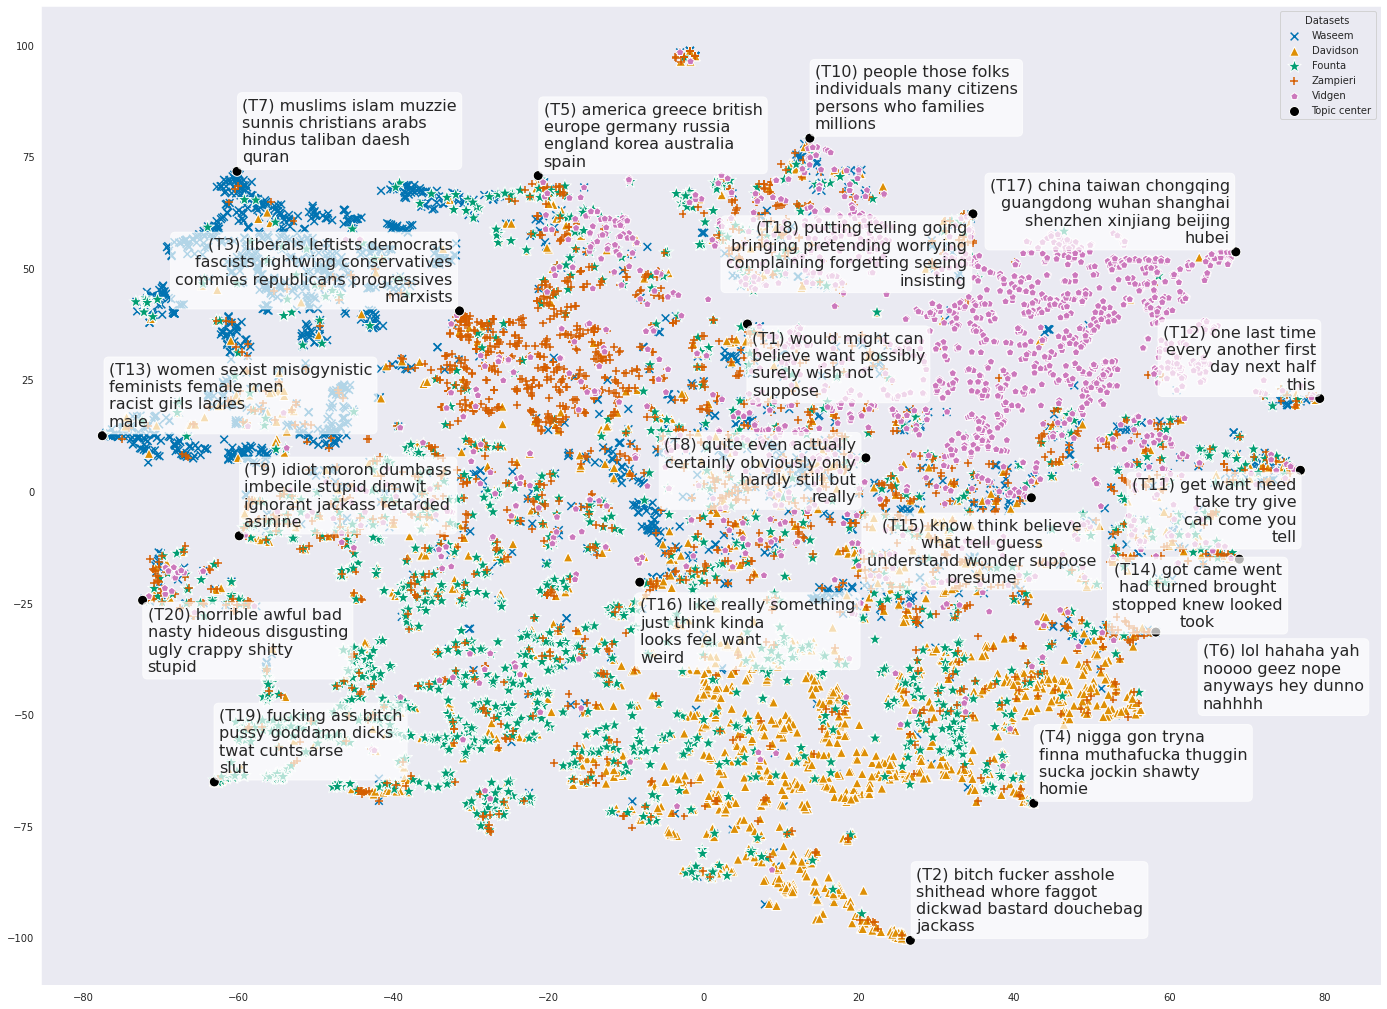

In [5]:
_ = cs.getContentMultiple(data_sets_text,exclude,dataset_names, embedding_path,file_suffix="hate-only",n=2000,on_distribution=False,components=20)

### All classes

Filter embedding space to 20210223-Waseem-Davidson-Founta-Zampieri-Vidgen dataset...
Embedding model read in 495.669s.
20210223-Waseem-Davidson-Founta-Zampieri-Vidgen:12503
Build topics...
kNN...
N Threads: 4
NearestNeighbors K=500
Time 0.002698746000532992
NN Distaces
Time 4.593644344000495
Saving cluwords
Matrix(12503, 12503)

Cosine Filter: 0.9
Computing TFIDF...
Number of cluwords 12503
Matrix(12503, 12503)

Computing TF...
tf shape (10000, 12503)
Cluwords TF done in 1.730s.
(10000, 12503)

Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=10000 and n_features=12503...
NMF done in 30.840519238001434.
Writing matrix W
W: (10000, 20) H:(12503, 20)
Writing matrix H
W: (10000, 20) H:(12503, 20)
tools/cluwords/cluwords/multi_embedding/results/20210223-Waseem-Davidson-Founta-Zampieri-Vidgen


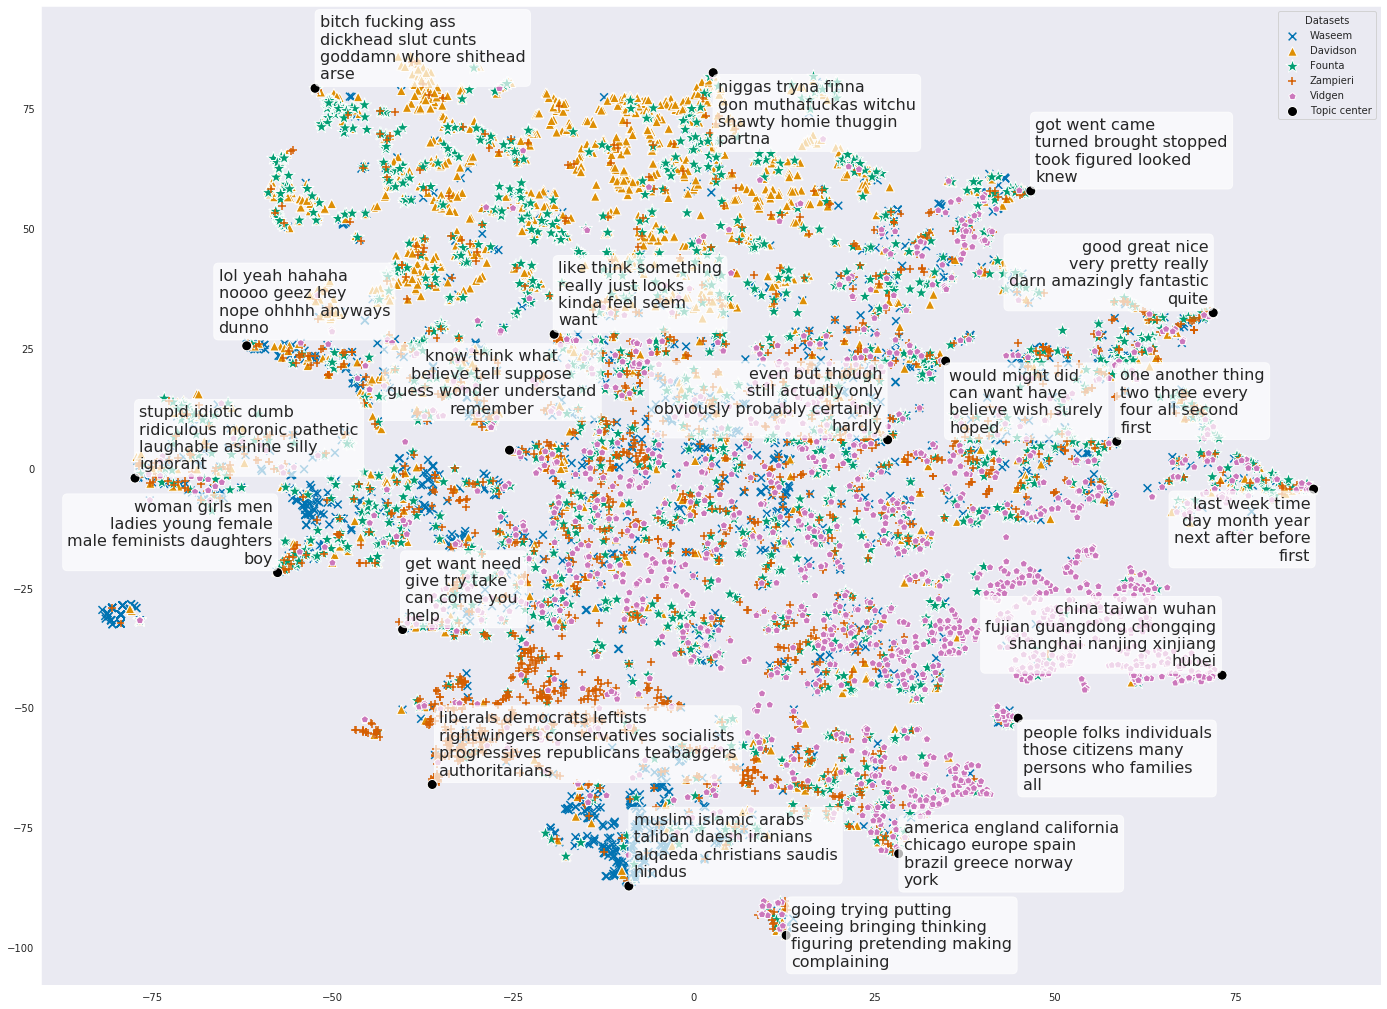

In [6]:
_ = cs.getContentMultiple(data_sets_text,exclude_empty,dataset_names, embedding_path,file_suffix="all-classes",n=2000,on_distribution=True,components=20)